## A Beginner's Notebook on EDA

Author: Aarthy R

Date of Creation: 19/10/23

Version 1

#### Dataset used: https://www.kaggle.com/datasets/aemyjutt/laptop-price-analysis/data

The Laptop Price Dataset is a comprehensive collection of data related to laptop prices, specifications, and various factors that influence the pricing of laptops. This dataset provides valuable insights into the dynamics of the laptop market, making it a valuable resource for researchers, analysts, and businesses in the technology industry.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load dataset

df = pd.read_csv('laptops_train.csv', nrows=50000)
df.shape

(977, 13)

In [ ]:
df.head()


,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
#check null values in all columns we will see and fix when null feature came
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
Storage                       0
GPU                           0
Operating System              0
Operating System Version    136
Weight                        0
Price                         0
dtype: int64

In [ ]:
df['Model Name'].value_counts()

XPS 13                22
Inspiron 3567         20
250 G6                18
Inspiron 5570         18
Vostro 3568           15
                      ..
Rog GL753VE-GC070T     1
Rog GL753VD-GC042T     1
Precision 5520         1
Precision 3510         1
ThinkPad T460          1
Name: Model Name, Length: 488, dtype: int64

In [ ]:
#we dont need model name column because we already have manufacterer and category feature
df.drop('Model Name',axis=1,inplace=True)

The column 'Model Name' is successfully deleted

In [ ]:
#we check data types, fix and convert to int and float to minimize data according to situations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Category                  977 non-null    object 
 2   Screen Size               977 non-null    object 
 3   Screen                    977 non-null    object 
 4   CPU                       977 non-null    object 
 5   RAM                       977 non-null    object 
 6   Storage                   977 non-null    object 
 7   GPU                       977 non-null    object 
 8   Operating System          977 non-null    object 
 9   Operating System Version  841 non-null    object 
 10  Weight                    977 non-null    object 
 11  Price                     977 non-null    float64
dtypes: float64(1), object(11)
memory usage: 91.7+ KB


### Data Transformation

The code includes sections for transforming and engineering new features, such as converting 'Screen' and 'CPU' values to simplified categories, handling 'Storage' data, and extracting relevant information from the 'RAM' and 'GPU' columns. It also addresses inconsistencies in 'Operating System' and 'Operating System Version' columns.

In [ ]:
df['Screen Size'].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

In [ ]:
#It is in object type so we need to minimize to int or float according to condition
df['Screen Size'].str.replace('"','')

0      13.3
1      13.3
2      15.6
3      15.4
4      13.3
       ... 
972    17.3
973    14.0
974    17.3
975    15.6
976    14.0
Name: Screen Size, Length: 977, dtype: object

In [ ]:
df['Screen Size'] = df['Screen Size'].str.replace('"','')

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df['Screen'].value_counts()

Full HD 1920x1080                                397
IPS Panel Full HD 1920x1080                      181
1366x768                                         180
Full HD / Touchscreen 1920x1080                   38
IPS Panel Full HD / Touchscreen 1920x1080         35
1600x900                                          19
Touchscreen 1366x768                              15
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                9
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
Touchscreen 2560x1440                              5
4K Ultra HD 3840x2160                              5
1440x900                                           4
IPS Panel Retina Display 2880x1800                 4
IPS Panel 2560x1440                           

### Segment into smaller unique Values


In [ ]:
def fun(display):
    if 'Touchscreen' in display:
        return 'Touch'
    else:
        return 'Non Touch'

In [ ]:
df['Screen'].apply(fun).value_counts()

Non Touch    836
Touch        141
Name: Screen, dtype: int64

In [ ]:
df['Screen'] = df['Screen'].apply(fun)

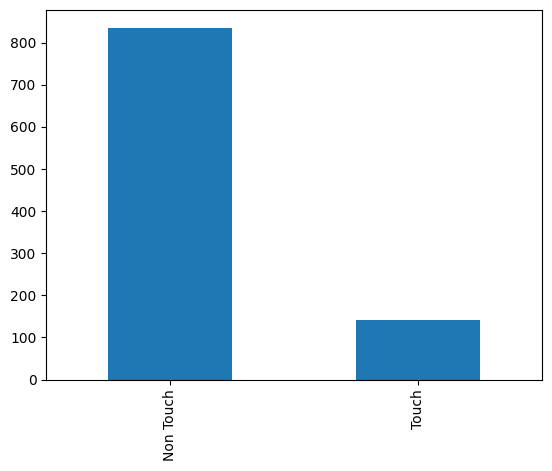

In [ ]:
df['Screen'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df['CPU'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [ ]:
def fun(cpu):
    if 'i3' in cpu:
        return 'i3'
    elif 'i5'in cpu:
        return 'i5'
    elif 'i7' in cpu:
        return 'i7'
    else:
        return 'others'

In [ ]:
df['CPU'] = df['CPU'].apply(fun)


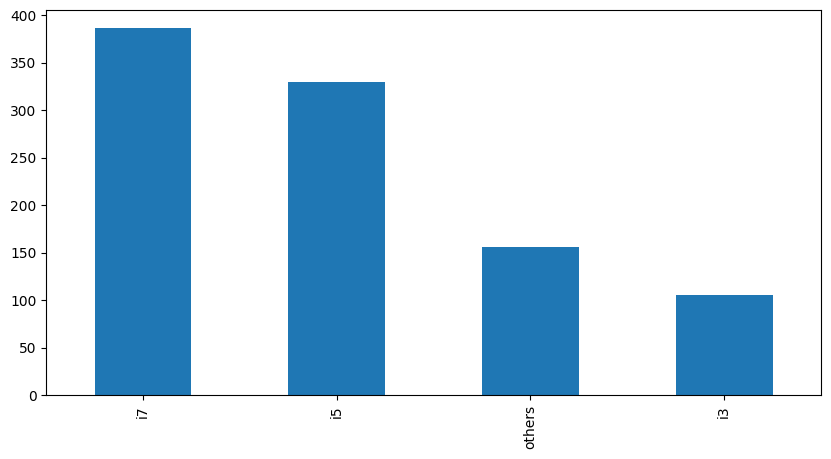

In [ ]:
plt.figure(figsize=(10,5))
df['CPU'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df['CPU'].value_counts()


i7        386
i5        330
others    156
i3        105
Name: CPU, dtype: int64

In [ ]:
df['Storage'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '1GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid'], dtype=object)

In [ ]:
df.drop('Storage',axis=1,inplace=True) #handling these data is impossible

In [ ]:
df.head()


,Manufacturer,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8GB,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8GB,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8GB,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16GB,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8GB,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df['RAM'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB'],
      dtype=object)

In [ ]:
df['RAM'].str.split('GB').str[0]

0       8
1       8
2       8
3      16
4       8
       ..
972    32
973     8
974    16
975     8
976     4
Name: RAM, Length: 977, dtype: object

In [ ]:
df['RAM'] = df['RAM'].str.split('GB').str[0]

In [ ]:
df['RAM'].unique()

array(['8', '16', '4', '2', '12', '6', '32', '24'], dtype=object)

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [ ]:
df['GPU'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [ ]:
def fun(gpu):
    if 'Nvidia' in gpu:
        return 'Nvidia'
    elif 'AMD' in gpu:
        return 'AMD'
    elif 'Intel' in gpu:
        return 'Intel'
    else:
        return 'others'

In [ ]:
df['GPU'].apply(fun)

0       Intel
1       Intel
2       Intel
3         AMD
4       Intel
        ...  
972    Nvidia
973     Intel
974    Nvidia
975    Nvidia
976     Intel
Name: GPU, Length: 977, dtype: object

In [ ]:
df['GPU'] = df['GPU'].apply(fun)


In [ ]:
df['GPU'].unique()

array(['Intel', 'AMD', 'Nvidia'], dtype=object)

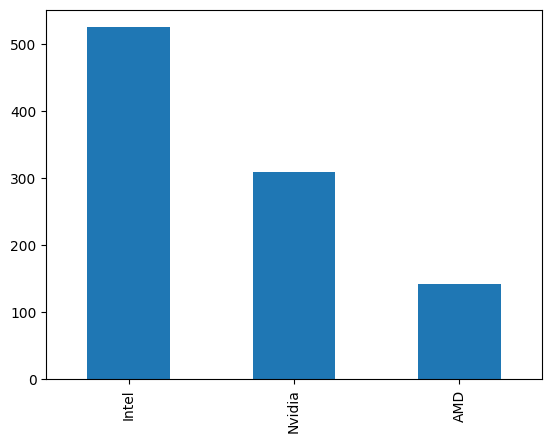

In [ ]:
df['GPU'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,macOS,NaN,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,macOS,NaN,1.34kg,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8,Intel,No OS,NaN,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16,AMD,macOS,NaN,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,macOS,NaN,1.37kg,16037611.20


In [ ]:
df['Operating System'].value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
macOS         13
Mac OS         4
Android        1
Name: Operating System, dtype: int64

In [ ]:
df['Operating System'].str.replace('macOS','Mac OS').value_counts()

Windows      837
No OS         52
Linux         48
Chrome OS     22
Mac OS        17
Android        1
Name: Operating System, dtype: int64

In [ ]:
df['Operating System'] = df['Operating System'].str.replace('macOS','Mac OS')

In [ ]:
df['Operating System Version'].value_counts()

10      819
7        10
10 S      8
X         4
Name: Operating System Version, dtype: int64

In [ ]:
df['Operating System Version'].unique()

array([nan, '10', 'X', '10 S', '7'], dtype=object)

In [ ]:
df['Operating System Version'].fillna(df['Operating System Version'].mode()[0]) #Replacing NaN with mode

0      10
1      10
2      10
3      10
4      10
       ..
972    10
973    10
974    10
975    10
976     7
Name: Operating System Version, Length: 977, dtype: object

In [ ]:
df['Operating System Version'] = df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])

In [ ]:
df['Operating System Version'].unique()

array(['10', 'X', '10 S', '7'], dtype=object)

In [ ]:
df['Operating System Version'].str.replace('X','10').unique()

array(['10', '10 S', '7'], dtype=object)

In [ ]:
df['Operating System Version'] = df['Operating System Version'].str.replace('X','10')

In [ ]:
df['Operating System Version'].unique()

array(['10', '10 S', '7'], dtype=object)

In [ ]:
df['Operating System Version'].str.replace('10 S','10').unique()

array(['10', '7'], dtype=object)

In [ ]:
df['Operating System Version'] = df['Operating System Version'].str.replace('10 S','10')

In [ ]:
df['Operating System Version'].unique()

array(['10', '7'], dtype=object)

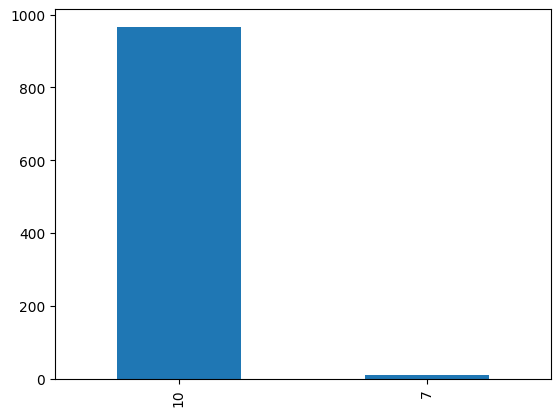

In [ ]:
df['Operating System Version'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.37kg,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.34kg,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8,Intel,No OS,10,1.86kg,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16,AMD,Mac OS,10,1.83kg,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.37kg,16037611.20


In [ ]:
df['Weight'].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [ ]:
#all laptops weight is in kg so we extract its values not with kg value
df['Weight'].str.split('kg').str[0].unique()

array(['1.37', '1.34', '1.86', '1.83', '2.1', '2.04', '1.3', '1.6', '2.2',
       '0.92', '1.22', '0.98', '2.5', '1.62', '1.91', '2.3', '1.35',
       '1.88', '1.89', '1.65', '2.71', '1.2', '1.44', '2.8', '2', '2.65',
       '2.77', '3.2', '0.69', '1.49', '2.4', '2.13', '2.43', '1.7', '1.4',
       '1.8', '1.9', '3', '1.252', '2.7', '2.02', '1.63', '1.96', '1.21',
       '2.45', '1.25', '1.5', '2.62', '1.38', '1.58', '1.85', '1.23',
       '1.26', '2.16', '2.36', '2.05', '1.32', '1.75', '0.97', '2.9',
       '2.56', '1.48', '1.74', '1.1', '1.56', '2.03', '1.05', '4.4',
       '1.90', '1.29', '2.0', '1.95', '2.06', '1.12', '1.42', '3.49',
       '3.35', '2.23', '4.42', '2.69', '2.37', '4.7', '3.6', '2.08',
       '4.3', '1.68', '1.41', '4.14', '2.18', '2.24', '2.67', '2.14',
       '1.36', '2.25', '2.15', '2.19', '2.54', '3.42', '1.28', '2.33',
       '1.45', '2.79', '1.84', '2.6', '2.26', '3.25', '1.59', '1.13',
       '1.78', '1.10', '1.15', '1.27', '1.43', '2.31', '1.16', '1.64',
   

In [ ]:
df['Weight'] = df['Weight'].str.split('kg').str[0]

In [ ]:
df.head()

,Manufacturer,Category,Screen Size,Screen,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.37,11912523.48
1,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.34,7993374.48
2,HP,Notebook,15.6,Non Touch,i5,8,Intel,No OS,10,1.86,5112900.00
3,Apple,Ultrabook,15.4,Non Touch,i7,16,AMD,Mac OS,10,1.83,22563005.40
4,Apple,Ultrabook,13.3,Non Touch,i5,8,Intel,Mac OS,10,1.37,16037611.20


In [ ]:
df['Price'].unique()

array([11912523.48,  7993374.48,  5112900.  , 22563005.4 , 16037611.2 ,
        3556800.  , 19028613.24, 10303160.4 , 13293540.  ,  6846840.  ,
        3502558.8 ,  3067651.08, 21696213.24,  4436218.8 , 11225260.8 ,
       13502946.6 ,  6624540.  , 25413336.  ,  4437108.  ,  8705268.  ,
        1706374.8 ,  8883108.  ,  2294136.  ,  7282548.  ,  5859828.  ,
        3722546.88,  9772308.  ,  7113600.  , 11541816.  ,  7967232.  ,
        2178451.08,  1769508.  ,  3903588.  , 16619148.  ,  8874216.  ,
        2214108.  ,  3263364.  ,  4345431.48,  7816068.  ,  3458988.  ,
       13329108.  ,  4650427.08,  6064344.  , 12617748.  ,  3281148.  ,
       11550708.  ,  5681988.  ,  4143672.  ,  2836548.  ,  7478172.  ,
        3543373.08,  9807876.  ,  3414528.  ,  6827277.6 ,  5212401.48,
       21776508.  ,  3690180.  ,  5326308.  ,  8367372.  ,  6135480.  ,
       17632836.  ,  3900831.48,  2036268.  ,  4881708.  ,  8438508.  ,
        9683388.  ,  8491860.  ,  7736040.  ,  9736740.  ,  4614

In [ ]:
df['Price'].astype('str').str[:7] #getting price in lakhs

0      1191252
1      7993374
2      5112900
3      2256300
4      1603761
        ...   
972    2489760
973    1049256
974    1822771
975    8705268
976    8909784
Name: Price, Length: 977, dtype: object

In [ ]:
df['Price'] = df['Price'].astype('str').str[:7]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              977 non-null    object
 1   Category                  977 non-null    object
 2   Screen Size               977 non-null    object
 3   Screen                    977 non-null    object
 4   CPU                       977 non-null    object
 5   RAM                       977 non-null    object
 6   GPU                       977 non-null    object
 7   Operating System          977 non-null    object
 8   Operating System Version  977 non-null    object
 9   Weight                    977 non-null    object
 10  Price                     977 non-null    object
dtypes: object(11)
memory usage: 84.1+ KB


## Handle DataTypes to Minimize Memory


Data types of various columns are converted to optimize memory usage, including removing units from values and converting them to suitable data types.

In [ ]:
df['Screen Size'] = df['Screen Size'].astype('float')
df['RAM'] = df['RAM'].astype('int')
df['Operating System Version'] = df['Operating System Version'].astype('int')
df['Weight'] = df['Weight'].astype('float')
df['Price'] = df['Price'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              977 non-null    object 
 1   Category                  977 non-null    object 
 2   Screen Size               977 non-null    float64
 3   Screen                    977 non-null    object 
 4   CPU                       977 non-null    object 
 5   RAM                       977 non-null    int64  
 6   GPU                       977 non-null    object 
 7   Operating System          977 non-null    object 
 8   Operating System Version  977 non-null    int64  
 9   Weight                    977 non-null    float64
 10  Price                     977 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 84.1+ KB


In [ ]:
df.select_dtypes(include='object').nunique()

Manufacturer        19
Category             6
Screen               2
CPU                  4
GPU                  3
Operating System     6
dtype: int64

In [ ]:
df['Manufacturer'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [ ]:
def fun(manu):
    if manu in ['Apple', 'HP', 'Dell', 'Lenovo', 'Microsoft']:
        return 'Major Brands'
    elif manu in ['Acer', 'Asus', 'MSI', 'Razer']:
        return 'Gaming Laptops'
    elif manu in ['Chuwi', 'Huawei', 'Xiaomi', 'Vero']:
        return 'Chinese Brands'
    else:
        return 'Other Brands'

In [ ]:
df['Manufacturer'].apply(fun)

0        Major Brands
1        Major Brands
2        Major Brands
3        Major Brands
4        Major Brands
            ...      
972      Major Brands
973      Other Brands
974    Gaming Laptops
975      Major Brands
976      Major Brands
Name: Manufacturer, Length: 977, dtype: object

In [ ]:
df['Manufacturer'] = df['Manufacturer'].apply(fun)

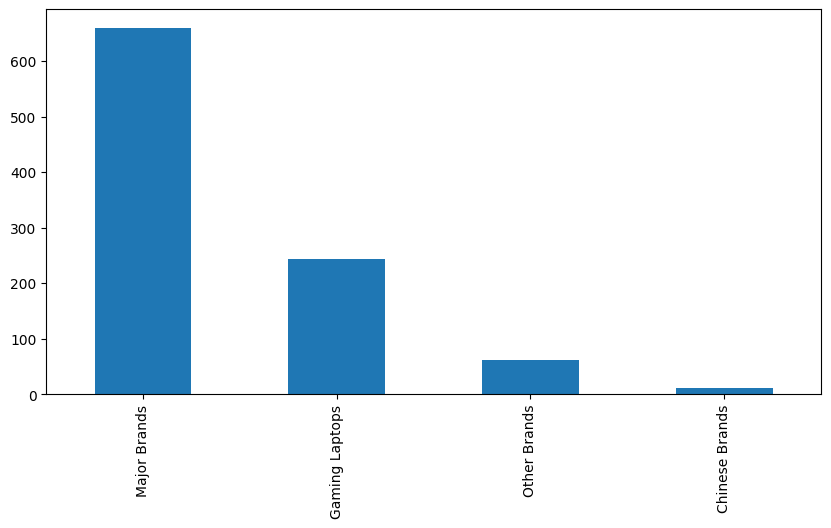

In [ ]:
plt.figure(figsize=(10,5))
df['Manufacturer'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.select_dtypes(include='object').nunique()

Manufacturer        4
Category            6
Screen              2
CPU                 4
GPU                 3
Operating System    6
dtype: int64

## Exploratory Data Analysis

The EDA part is divided into several sub-sections:

- Univariate Analysis: Analyzing categorical features through count plots and numerical features through histograms.
- Categorical Data Distribution: Creating pie charts to visualize the distribution of unique values in categorical columns.
- Numerical Data Distribution: Visualizing numerical data using histograms.
- Analysis of Features with Respect to 'Price': Analyzing how categorical features are related to the target variable 'Price'.
- Box Plots for Outlier Identification: Identifying and visualizing outliers in the numerical features.
- Removing Outliers: Removing outliers using the IQR method for specified features.
- Checking for Outlier Removal: Verifying the success of outlier removal by plotting box plots again.

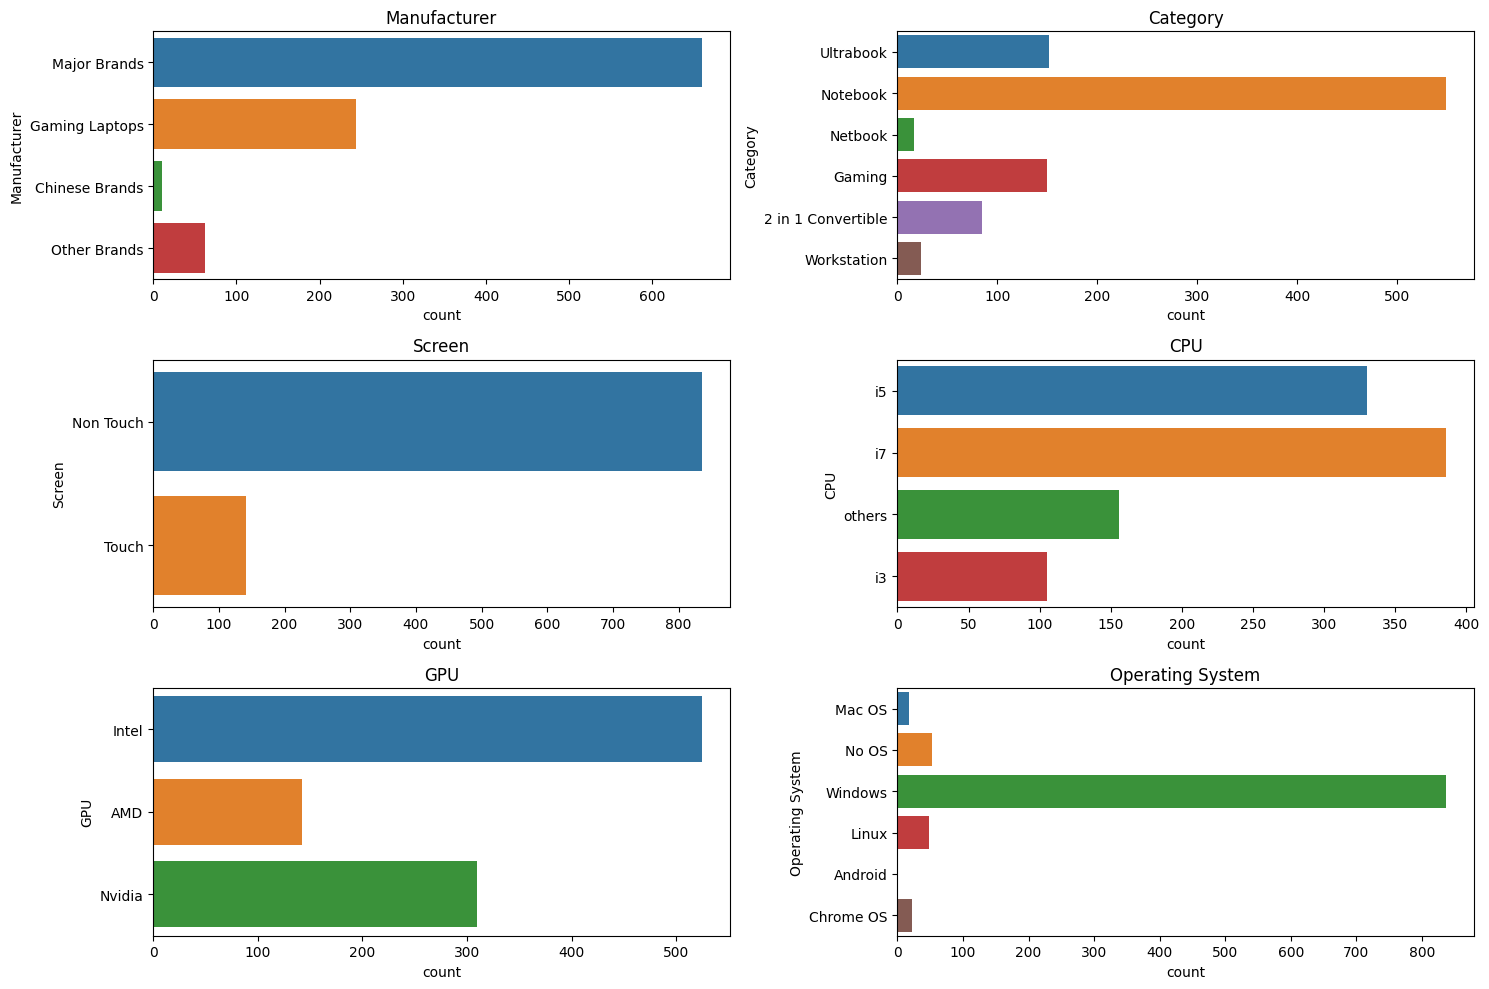

In [ ]:
#univariant analysis
cat_vars = df.select_dtypes(include='object')

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (cat_vars):
    sns.countplot(y=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

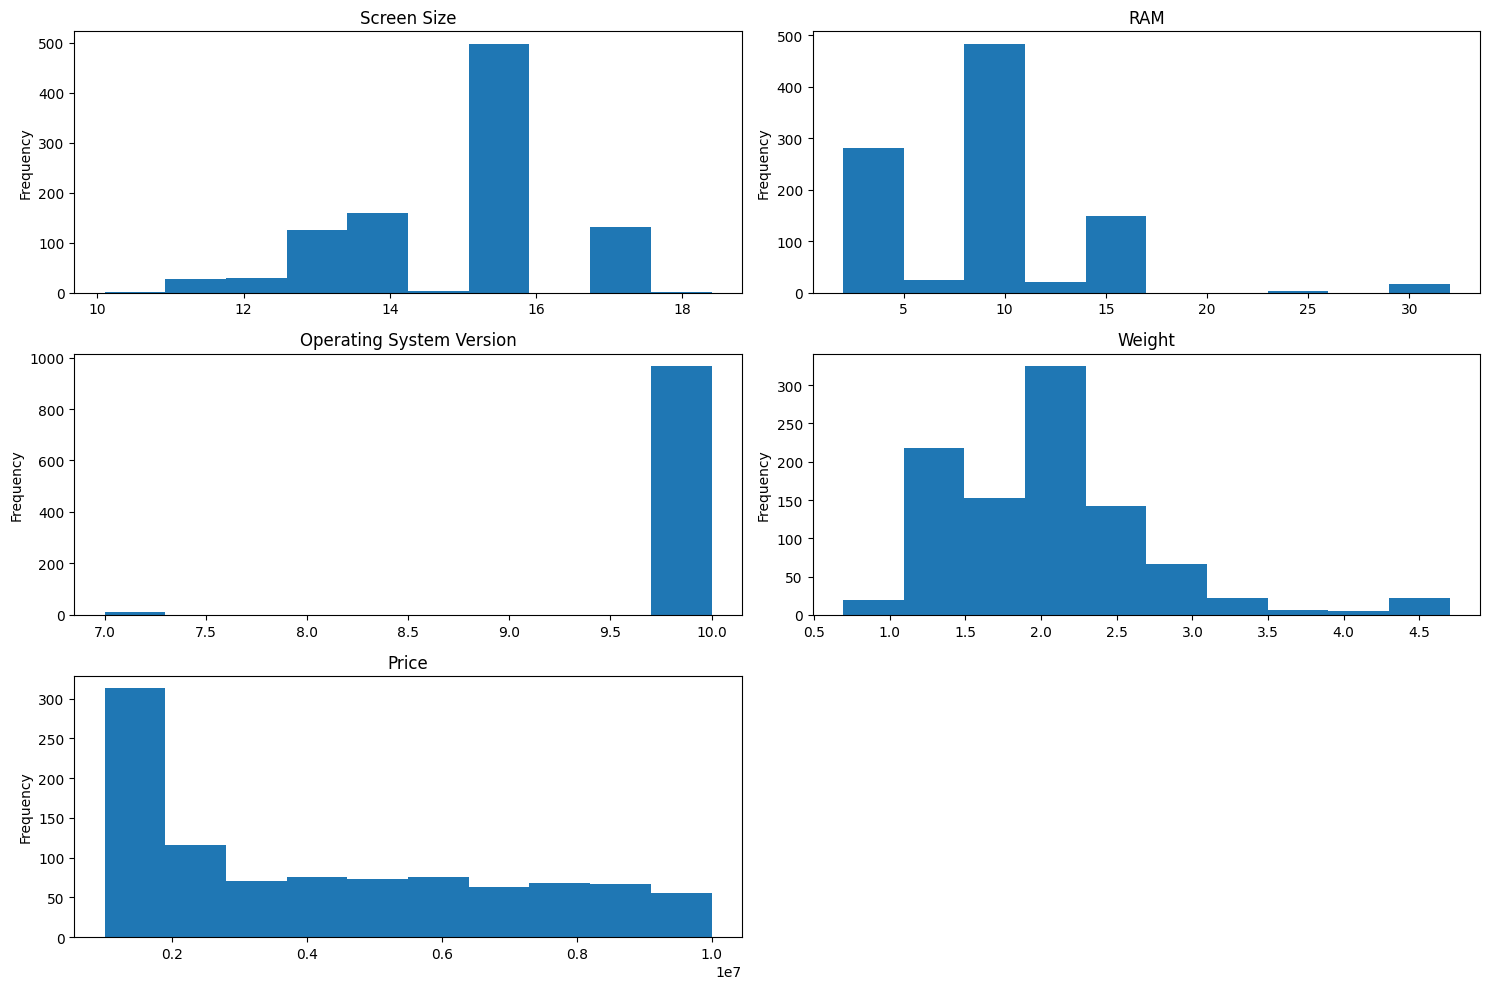

In [ ]:
#exploratary data analysis on numerical or continuous features
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

fig , axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i , var in enumerate (int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

col = len(int_vars)
row = len(axs)

if col < row:
    for i in range(col, row):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

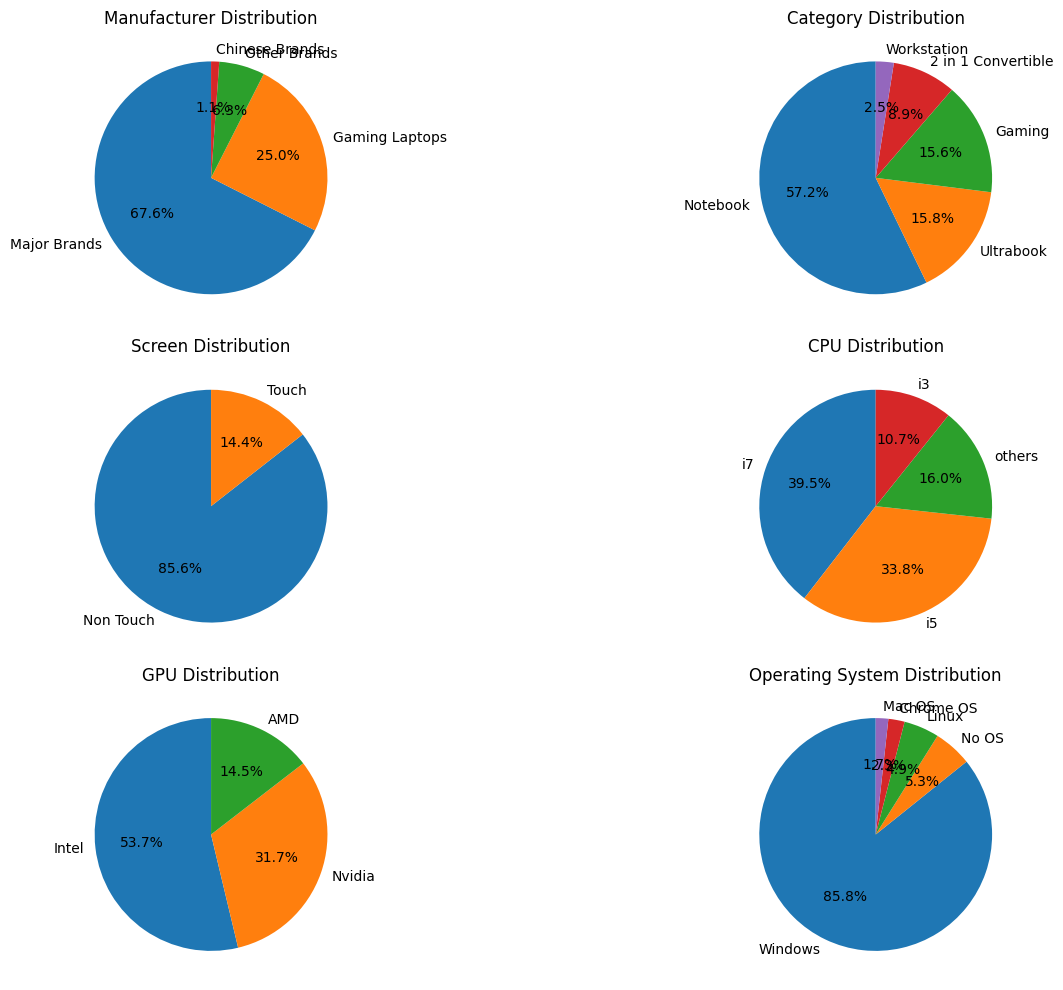

In [ ]:
cat_vars = df.select_dtypes(include='object')

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))

for i ,var in enumerate(cat_vars):
    if i < len(axs.flat):

        cat_counts = df[var].value_counts().head()

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%' ,startangle=90)
        axs.flat[i].set_title(f'{var} Distribution')

fig.tight_layout()
plt.show()

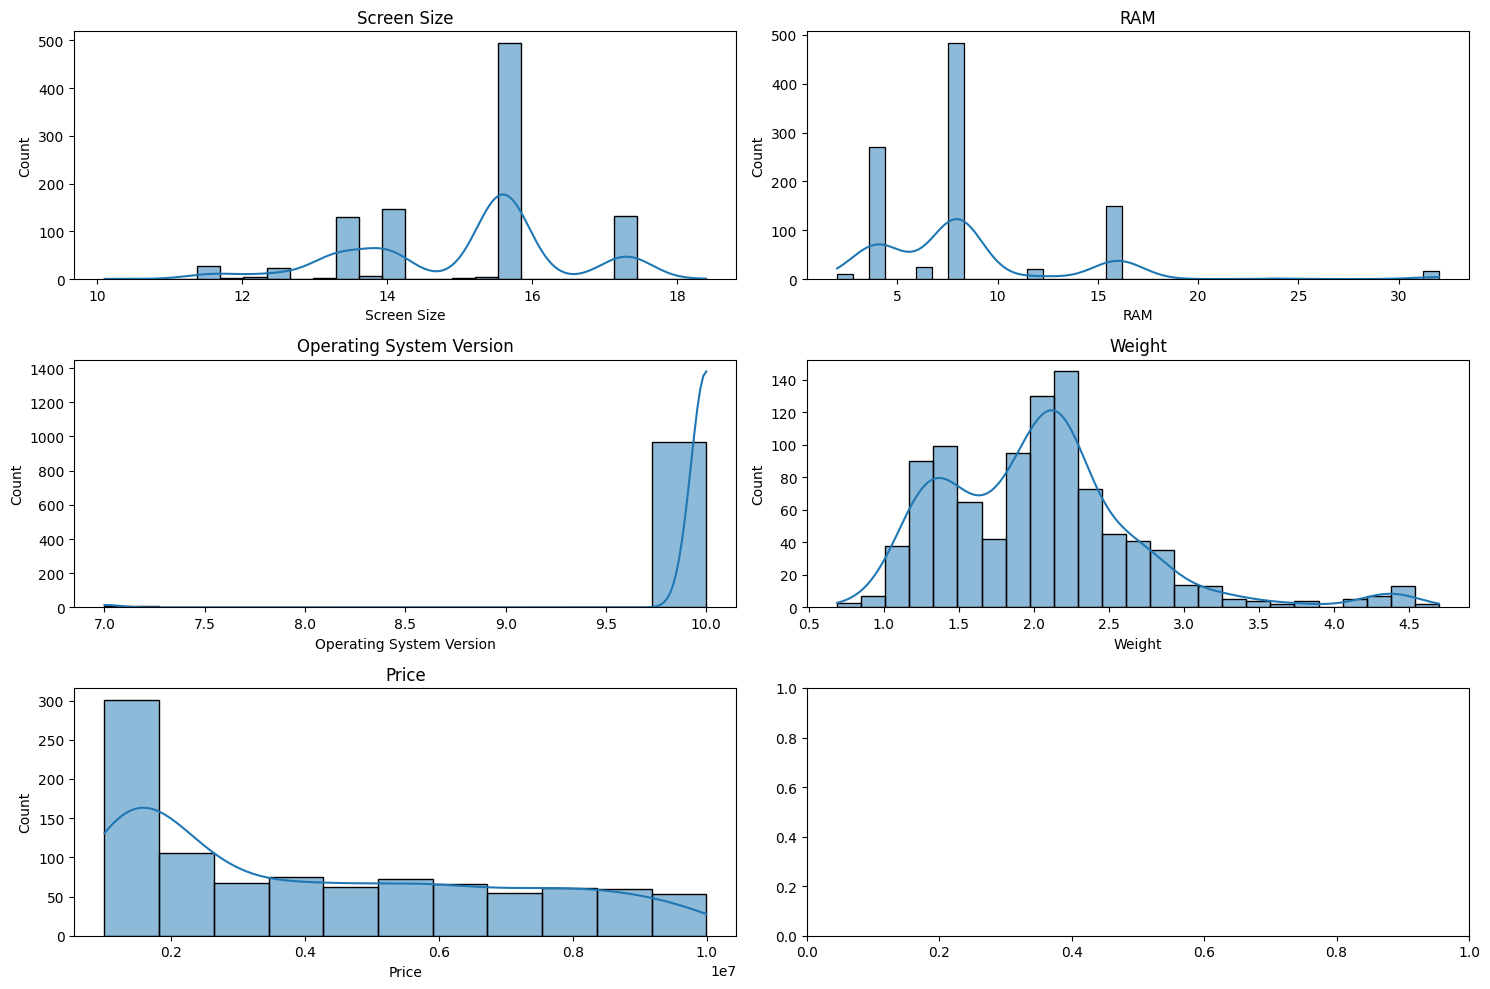

In [ ]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.histplot(x=var,data=df,kde=True,ax=axs[i])
    axs[i].set_title(var)

col = len(int_vars)
row = len(axs)

if col < row:
    for i in range(col, row):
        fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

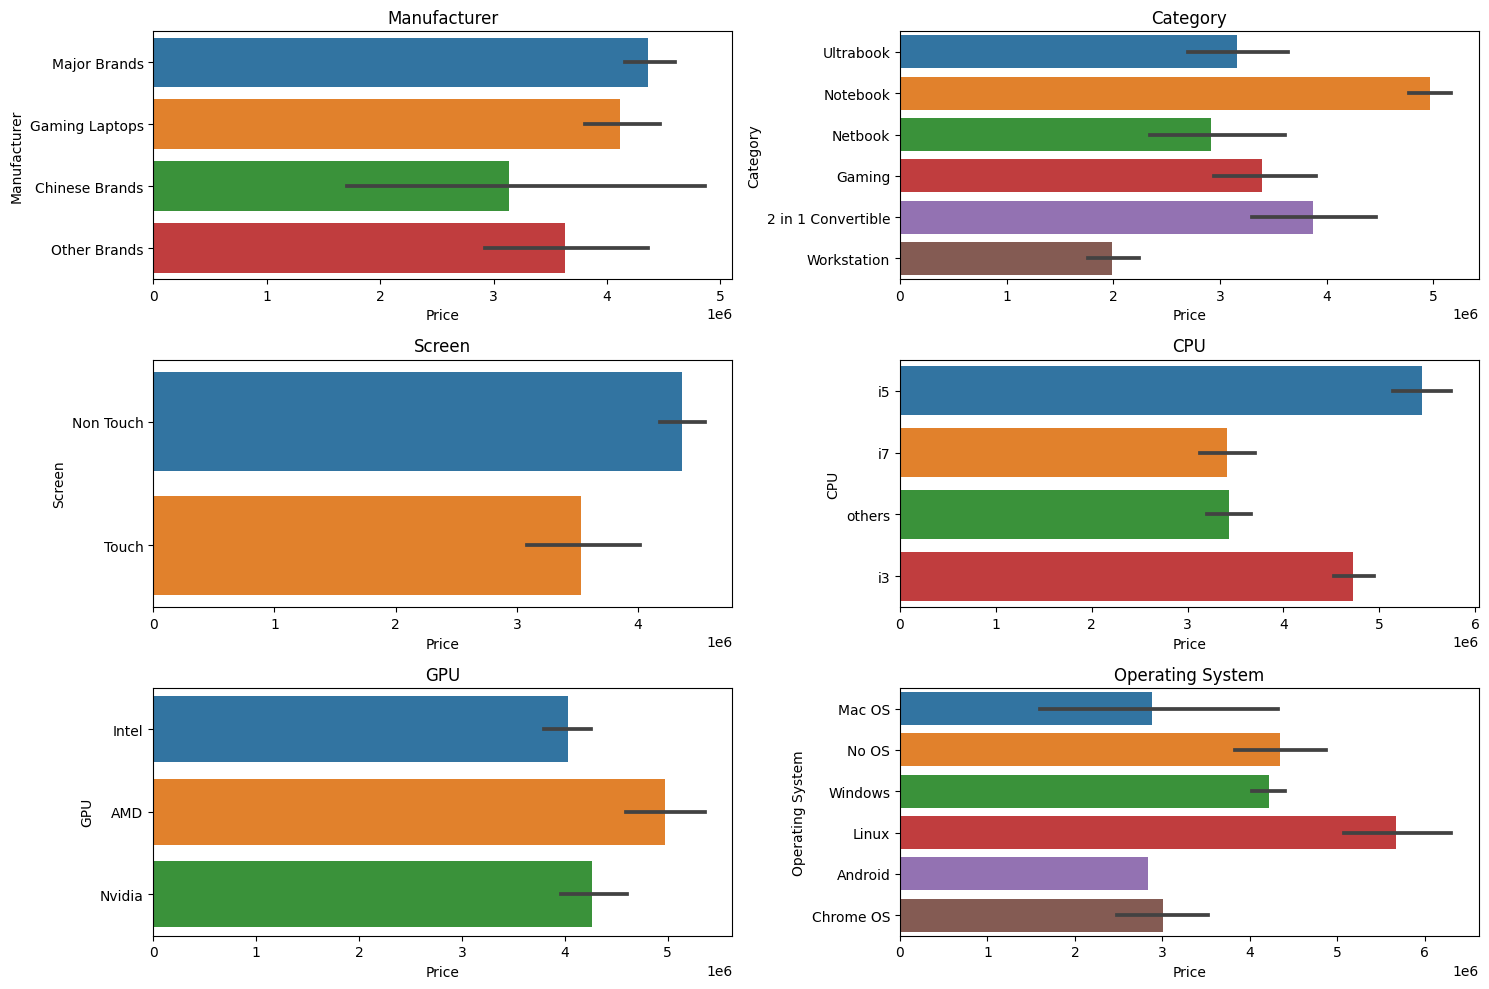

In [ ]:
#EDA using dependent feature price
cat_vars = df.select_dtypes(include='object')

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (cat_vars):
    sns.barplot(x='Price', y=var, data=df, ax=axs[i])
    axs[i].set_title(var)

fig.tight_layout()
plt.show()

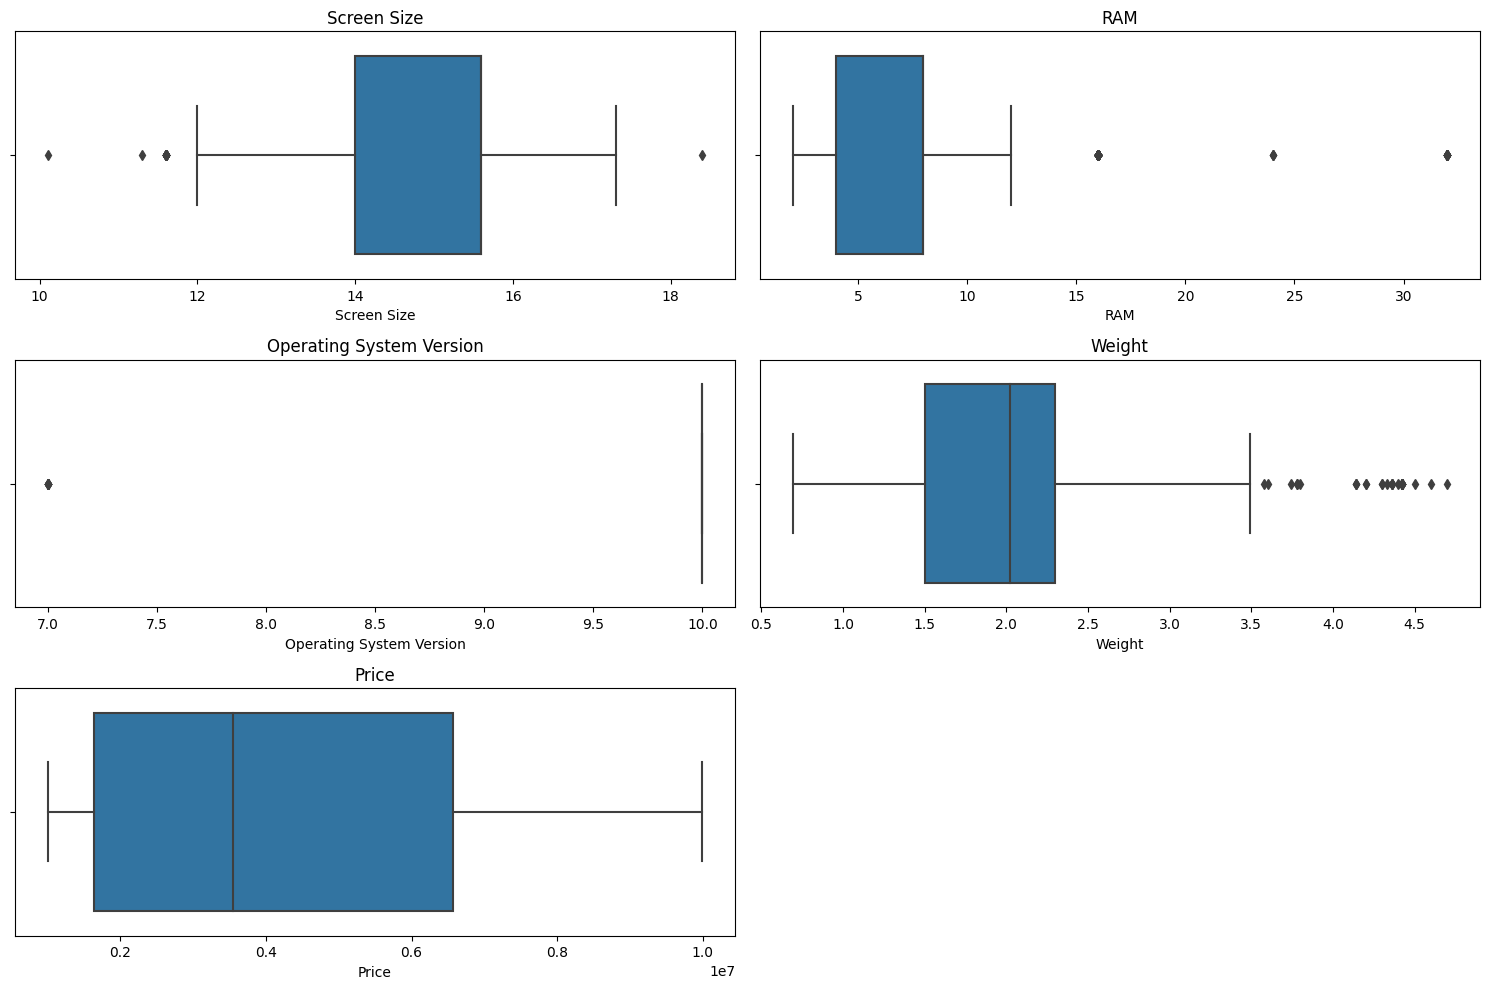

In [ ]:
#exploratary data anaylsis with boxplot to indentify outliers
int_vars = df.select_dtypes(include=['int','float']).columns.tolist()

fig , axs = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
axs = axs.flatten()

for i , var in enumerate (int_vars):
    sns.boxplot(data=df,x=var,ax=axs[i])
    axs[i].set_title(var)

col = len(int_vars)
row = len(axs)

if col < row:
    for i in range(col, row):
        fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

In [ ]:
#print all unique values that are in categorical features
for col in df.select_dtypes(include=['object']).columns:
    print(f'{col}: {df[col].unique()}')

Manufacturer: ['Major Brands' 'Gaming Laptops' 'Chinese Brands' 'Other Brands']
Category: ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
Screen: ['Non Touch' 'Touch']
CPU: ['i5' 'i7' 'others' 'i3']
GPU: ['Intel' 'AMD' 'Nvidia']
Operating System: ['Mac OS' 'No OS' 'Windows' 'Linux' 'Android' 'Chrome OS']


In [ ]:
#Encoding: Label Encoder
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])
    print(f'{col} : {df[col].unique()}')

Manufacturer : [2 1 0 3]
Category : [4 3 2 1 0 5]
Screen : [0 1]
CPU : [1 2 3 0]
GPU : [1 0 2]
Operating System : [3 4 5 2 0 1]


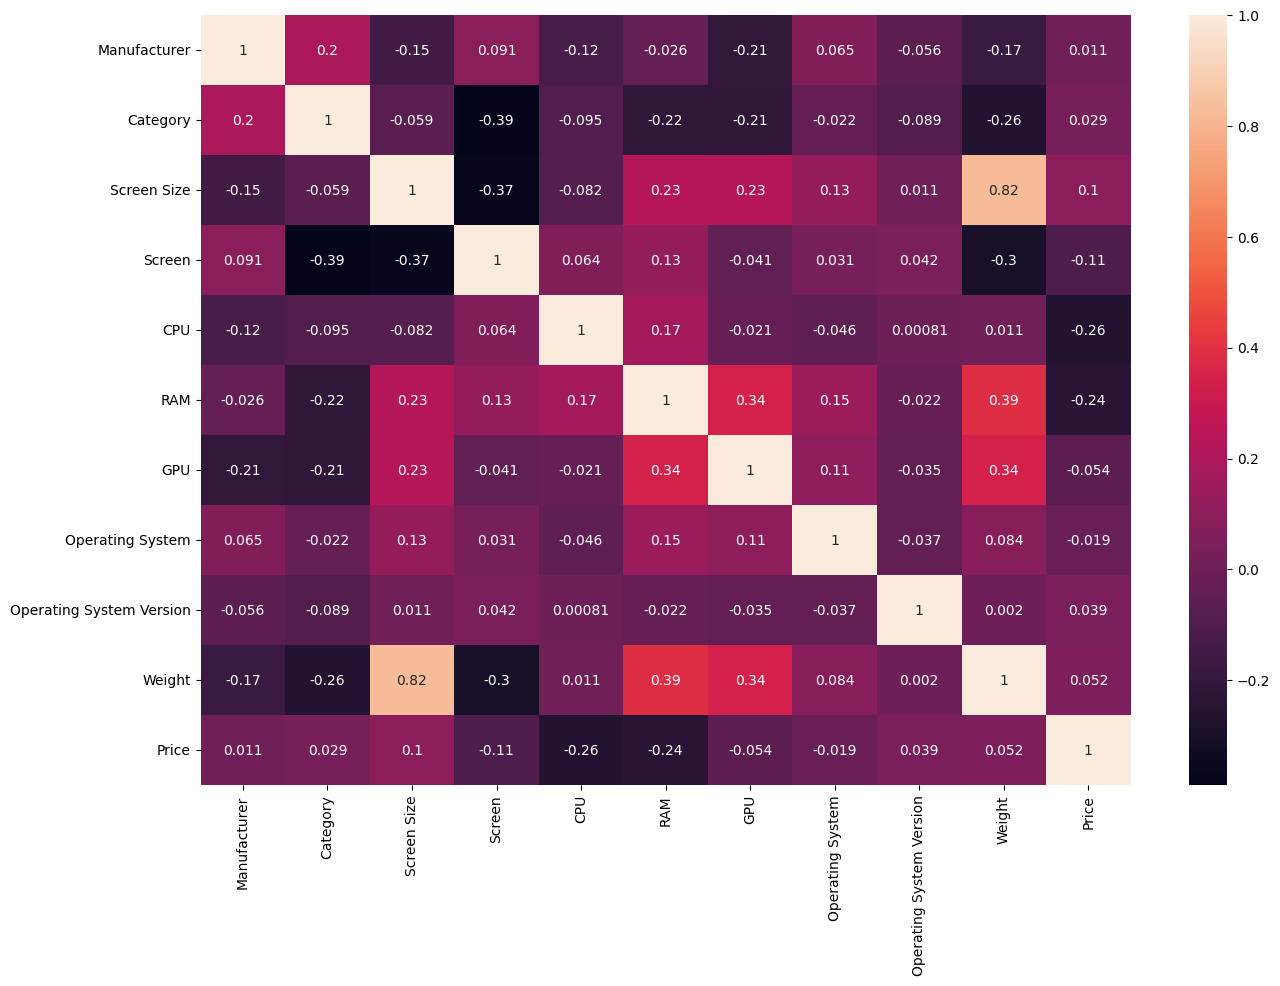

In [ ]:
#correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

In [ ]:
#weight has high correlation so we drop this feature
df.drop('Weight',axis=1,inplace=True)

In [ ]:
#features with outliers to be removed
Features_with_outliers=['Screen Size','RAM','Operating System Version']

In [ ]:
def remove_outliers_iqr(data):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))

    return data[(data >= lower_bound) & (data <= upper_bound)]

In [ ]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

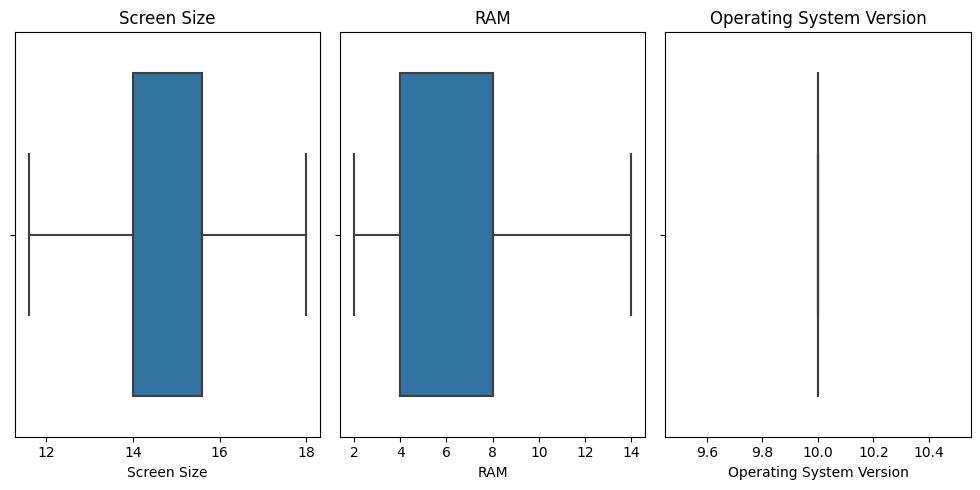

In [ ]:
#checking for Outlier removal
int_vars = ['Screen Size','RAM','Operating System Version']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Summary:

In this exploratory data analysis (EDA) process, we systematically examined the laptop price dataset to gain insights into its structure and characteristics. The following key steps were performed during our analysis:

1. We loaded the dataset and checked for any missing values to ensure data integrity.

2. The 'Model Name' column was removed from the dataset as it was deemed redundant for our analysis.

3. We optimized memory usage by converting data types and removing units from certain columns.

4. Feature engineering was conducted, including categorizing 'Screen' and 'CPU' attributes, addressing 'Storage' data, and extracting relevant information from 'RAM' and 'GPU' columns.

5. Inconsistencies in the 'Operating System' and 'Operating System Version' columns were rectified.

6. Categorical data was encoded using the Label Encoder, making it suitable for machine learning applications.

7. Extensive exploratory data analysis (EDA) was conducted to understand data distributions and relationships between variables.

8. Outliers in specific features were identified and removed using the Interquartile Range (IQR) method.

9. The 'Weight' feature was dropped due to its high correlation with other features.

10. Finally, a correlation heatmap was created to visualize relationships between numerical features in the dataset.

This EDA process has provided valuable insights into the laptop price dataset, which can be further utilized for machine learning modeling or more in-depth analysis.